<center><h1>Squad Matching Algorithm</h1></center>

A key aspect of the RadicalX group internships is matching interns to a squad that matches their preferences. The onboarding process for all interns includes a detailed form where they enter the internships they are interested in, their preferences for their squad, their preferred start date, their educational and work background, and self-rating of skills that are relevant to the internship.

This file contains 4 parts.
- Intially we are Cleaning the data
- Then we Encode the clean dataset to input in algorithm
- Followed by using K-Means Algorithm to make squads
- Lastly, we are displaying the Insights/Analytics of our data

<center><h3>Cleaning the dataset</h3></center>

#### Import all required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
# Dataset is being read in df
df = pd.read_csv("SquadData.csv",header=None)

In [3]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Name,Squad Number,Do you have any preferred language of communic...,What Group Virtual Internship Program are you ...,Age,City,Country,Region,Time Zone,current occupation?,...,Product Design,Product Development,Growth Marketing,Leading groups,Where did you hear about this internship?,Which cohorts are you available to start the P...,Which cohorts are you available to start the P...,Which cohorts are you available to start the P...,Which cohorts are you available to start the P...,How many hours per week are you able to give t...
1,Grayson,NaN,i prefer english but i am also able to communi...,"Product Marketing,Product Growth",23,bordj bou arreridj,Algeria,MENA,"Europe,Africa",Recently Graduated and Unemployed,...,NaN,NaN,4,NaN,linkedin,"Starting on 15th August,Starting on 22nd August",NaN,NaN,Starting on 5th September,20-25 hours
2,Jonas,NaN,English,"Product Marketing,Product Growth ,Product Design",23,Algiers,Algeria,MENA,"Africa,Europe",Recently Graduated and Unemployed,...,3,NaN,4,4,Linkedin,"Starting on 12th September,Starting on 15th Au...","Starting on 3rd October,Starting on 22nd August",NaN,Starting on 3rd October,10-15 hours
3,Ronan,NaN,English and Spanish are good for me.,Product Design,34,"Buenos Aires, Argentina",Argentina,Americas,Americas,Employed,...,4,NaN,NaN,5,A friend told me about it.,NaN,Starting on 22nd August,NaN,NaN,15-20 hours
4,Dulce,NaN,spanish,Product Design,38,Mendoza,Argentina,Americas,Americas,Employed,...,3,NaN,NaN,4,Linkedin,NaN,Starting on 22nd August,NaN,NaN,20-25 hours


In [4]:
# Initializing the list to update column names
headers = ["Name","Squad_Num","Prefered_Lang","Interested_Grp","Age","City","Country","Region","Timezone",
          "Occupation","Degree","Prev_Took_Courses","Intern_Experience","Product_Management","Digital_Marketing",
          "Market_Research","Digital_Illustration","Product_Design","Product_Development","Growth_Marketing",
          "Leading_Groups","Internship_News","Cohort_Product_Marketing","Cohort_Product_Design",
          "Cohort_Product_Development","Cohort_Product_Growth","Hours_Per_Week"]

In [5]:
# Drop first row(index = 0) having old column names
df = df.drop(index=0)

In [6]:
# Reset the index number to start from 0 again
df.reset_index(drop=True,inplace=True)

In [7]:
# Assign new column names to the table
df.columns = headers

In [8]:
df.head()

,Name,Squad_Num,Prefered_Lang,Interested_Grp,Age,City,Country,Region,Timezone,Occupation,...,Product_Design,Product_Development,Growth_Marketing,Leading_Groups,Internship_News,Cohort_Product_Marketing,Cohort_Product_Design,Cohort_Product_Development,Cohort_Product_Growth,Hours_Per_Week
0,Grayson,NaN,i prefer english but i am also able to communi...,"Product Marketing,Product Growth",23,bordj bou arreridj,Algeria,MENA,"Europe,Africa",Recently Graduated and Unemployed,...,NaN,NaN,4,NaN,linkedin,"Starting on 15th August,Starting on 22nd August",NaN,NaN,Starting on 5th September,20-25 hours
1,Jonas,NaN,English,"Product Marketing,Product Growth ,Product Design",23,Algiers,Algeria,MENA,"Africa,Europe",Recently Graduated and Unemployed,...,3,NaN,4,4,Linkedin,"Starting on 12th September,Starting on 15th Au...","Starting on 3rd October,Starting on 22nd August",NaN,Starting on 3rd October,10-15 hours
2,Ronan,NaN,English and Spanish are good for me.,Product Design,34,"Buenos Aires, Argentina",Argentina,Americas,Americas,Employed,...,4,NaN,NaN,5,A friend told me about it.,NaN,Starting on 22nd August,NaN,NaN,15-20 hours
3,Dulce,NaN,spanish,Product Design,38,Mendoza,Argentina,Americas,Americas,Employed,...,3,NaN,NaN,4,Linkedin,NaN,Starting on 22nd August,NaN,NaN,20-25 hours
4,Evelyn,NaN,Spanish,Product Marketing,22,Tigre,Argentina,Americas,Any/No preference,Recently Graduated and Unemployed,...,NaN,NaN,NaN,4,Linkedin,"Starting on 22nd August,Starting on 15th August",NaN,NaN,NaN,20-25 hours


In [9]:
# Extract dataset having updated column names to further work on
df.to_csv("Dataset.csv",index=False)

In [10]:
# Read Updated column name dataset
df = pd.read_csv("Dataset.csv")

In [11]:
# Check dataset having null values
df.isnull().sum()

Name                             0
Squad_Num                     1188
Prefered_Lang                   19
Interested_Grp                   0
Age                              0
City                             0
Country                          0
Region                           4
Timezone                         1
Occupation                       0
Degree                           4
Prev_Took_Courses                0
Intern_Experience                0
Product_Management               0
Digital_Marketing              709
Market_Research                220
Digital_Illustration           303
Product_Design                 265
Product_Development            661
Growth_Marketing               888
Leading_Groups                 689
Internship_News                  0
Cohort_Product_Marketing       716
Cohort_Product_Design          587
Cohort_Product_Development     662
Cohort_Product_Growth          889
Hours_Per_Week                   0
dtype: int64

<AxesSubplot:>

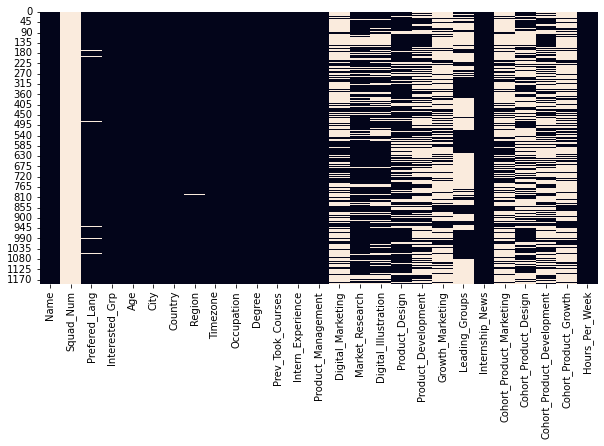

In [12]:
# White lines in plot shows missing values in the each column
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(df.isnull(), cbar=False)

#### Squad Number Column

In [13]:
# The values in the column used to be objects which are now converted to float.
df["Squad_Num"] = pd.to_numeric(df["Squad_Num"], downcast="integer")

# Replacing NaN values with mean of column
# Initially storing -1 for squad number just to 
df['Squad_Num'].fillna((-1) , inplace = True)

# Changing type to integer
df['Squad_Num'] = df['Squad_Num'].astype(int)

df['Squad_Num'].head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: Squad_Num, dtype: int64

####  Prefered Language Column

In [14]:
# Using Regex pattern, we are storing the first prefrred language of the person
# Normalizing the long statements to languages only e.g. "I am comfortbale to english" = "English"
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[fF,]r.*', value= 'French', regex= True) 
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Ee,]n.*', value= 'English', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Aa,]r.*', value= 'Arabic', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[eE,]N.*', value= 'English', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Bb,]a.*', value= 'Bahasa', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Uu,]r.*', value= 'Urdu', regex= True)
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Uu,]k.*', value= 'Ukranian', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Tt,]a.*', value= 'Tamil', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Ss,]p.*', value= 'Spanish', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[Hh,]i.*', value= 'Hindi', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[pP,]u.*', value= 'Punjabi', regex= True)  
df['Prefered_Lang']=df['Prefered_Lang'].replace(to_replace='.*[nN,]o.*', value= 'English', regex= True)  

df['Prefered_Lang'].head()

0    English
1    English
2    English
3    Spanish
4    Spanish
Name: Prefered_Lang, dtype: object

#### Interested Group Column

In [15]:
# Using split method to discard all the values after comma
# e.g Original values = Product Growth, Product Marketing | Processed value = Product Growth
df['Interested_Grp']=df['Interested_Grp'].str.split(',').str[0]
df['Interested_Grp'].head()

0    Product Marketing
1    Product Marketing
2       Product Design
3       Product Design
4    Product Marketing
Name: Interested_Grp, dtype: object

#### Age, City, Country Column

In [16]:
# Age, city and column have no missing values
# We will encode its values later

#### Region Column

In [17]:
# Identify missing values from Region
temp1 = pd.isnull(df["Region"])
temp2 = df[temp1]

# temp 2 Region data contain null values
temp2['Timezone']= temp2['Timezone'].str.split(',').str[0]
temp2['Timezone']

# Based on the Time zone replacing all the null values in the Region
temp2['Region'] = temp2["Timezone"]

# Upadated values in temp2 are stored inplace of missing values in df
df.loc[temp2.index, :] = temp2[:]

#### Timezone Column

In [18]:
# Values of Region and Timezone are same other then some values.
df['Timezone']=df["Region"]
df['Timezone'] = df['Timezone'].replace(['APAC','MENA'],['Asia','Africa'])
df['Timezone'].head()

0      Africa
1      Africa
2    Americas
3    Americas
4    Americas
Name: Timezone, dtype: object

#### Occupation Column

In [19]:
#Changing all the students (High School Student and Uni Students) to '0'
df['Occupation'] = df['Occupation'].replace(['University Student'],0)
df['Occupation'] = df['Occupation'].replace(['High School Student'],0)

#All Unemployed are marked as '1'
df['Occupation'] = df['Occupation'].replace(['Recently Graduated and Unemployed'],1)
df['Occupation'] = df['Occupation'].replace(['Currently Unemployed'],1)

#Changing all the Employed data sets to '2'
df['Occupation'] = df['Occupation'].replace(['Employed'],2)

# Typecasting into Integar
df['Occupation'] = df['Occupation'].astype(int)

df['Occupation'].head()

0    1
1    1
2    2
3    2
4    1
Name: Occupation, dtype: int64

#### Degree Column

In [20]:
# Replacing NaN values with String = "Other"
check = "Other"
df['Degree'].fillna((check) , inplace = True)

df['Degree'].head()

0                               computer science
1                  Marketing and communication q
2                               Public Relations
3                                            yes
4    Advertising and institutional communication
Name: Degree, dtype: object

#### Previously Took Courses Column

In [21]:
#"No, I have not" is replaced with "0"
df['Prev_Took_Courses'] = df['Prev_Took_Courses'].replace(['No, I have not'],0)

#"Yes, I have completed multiple such courses" is replaced with "1"
df['Prev_Took_Courses'] = df['Prev_Took_Courses'].replace(['Yes, I have completed multiple such courses'],1)

#"I have started a few, but haven't really gotten much out of them/haven't completed any" is replaced with "2"
df['Prev_Took_Courses'] = df['Prev_Took_Courses'].replace(['I have started a few, but haven\'t really gotten much out of them/haven\'t completed any'],2)

# Typecasting into Integar
df['Prev_Took_Courses'] = df['Prev_Took_Courses'].astype(int)

df['Prev_Took_Courses'].head(5)

0    1
1    1
2    1
3    1
4    0
Name: Prev_Took_Courses, dtype: int64

#### Intern having Previous experience

In [22]:
# "No" is replaced with "0"
df['Intern_Experience'] = df['Intern_Experience'].replace(['No'],0)

# "Yes" is replaced with "1"
df['Intern_Experience'] = df['Intern_Experience'].replace(['Yes'],1)

# Typecasting into Integar
df['Intern_Experience'] = df['Intern_Experience'].astype(int)

df['Intern_Experience'].head()

0    1
1    1
2    0
3    0
4    0
Name: Intern_Experience, dtype: int64

#### Product Management Column

In [23]:
# We will use this column for insights

#### Digital Marketing Column

In [24]:
# The values in the column used to be objects which are now converted to float.
df["Digital_Marketing"] = pd.to_numeric(df["Digital_Marketing"], downcast="integer")

# Calculating the mean of column
mean_df = (df['Digital_Marketing'].mean())

# Replacing NaN values with mean of column
df['Digital_Marketing'].fillna((mean_df) , inplace = True)

# Changing type to integer
df['Digital_Marketing'] = df['Digital_Marketing'].astype(int)

df['Digital_Marketing'].head()

0    5
1    4
2    3
3    3
4    2
Name: Digital_Marketing, dtype: int64

#### Market Research Column

In [25]:
# The values in the column used to be objects which are now converted to float.
df["Market_Research"] = pd.to_numeric(df["Market_Research"], downcast="integer")

# Calculating the mean of column
mean_df = (df['Market_Research'].mean())

# Replacing NaN values with mean of column
df['Market_Research'].fillna((mean_df) , inplace = True)

# Changing type to integer
df['Market_Research'] = df['Market_Research'].astype(int)

df['Market_Research'].head()

0    3
1    4
2    3
3    2
4    2
Name: Market_Research, dtype: int64

#### Digital Illustration Column

In [26]:
# The values in the column used to be objects which are now converted to float.
df["Digital_Illustration"] = pd.to_numeric(df["Digital_Illustration"], downcast="integer")

# Calculating the mean of column
mean_df = (df['Digital_Illustration'].mean())

# Replacing NaN values with mean of column
df['Digital_Illustration'].fillna((mean_df) , inplace = True)

# Changing type to integer
df['Digital_Illustration'] = df['Digital_Illustration'].astype(int)

df['Digital_Illustration'].head()

0    1
1    2
2    3
3    3
4    2
Name: Digital_Illustration, dtype: int64

#### Product Design Column

In [27]:
# The values in the column used to be objects which are now converted to float.
df["Product_Design"] = pd.to_numeric(df["Product_Design"], downcast="integer")

# Calculating the mean of column
mean_df = (df['Product_Design'].mean())

# Replacing NaN values with mean of column
df['Product_Design'].fillna((mean_df) , inplace = True)

# Changing type to integer
df['Product_Design'] = df['Product_Design'].astype(int)

df['Product_Design'].head()

0    2
1    3
2    4
3    3
4    2
Name: Product_Design, dtype: int64

#### Product Development Column

In [28]:
# The values in the column used to be objects which are now converted to float.
df["Product_Development"] = pd.to_numeric(df["Product_Development"], downcast="integer")

# Calculating the mean of column
mean_df = (df['Product_Development'].mean())

# Replacing NaN values with mean of column
df['Product_Development'].fillna((mean_df) , inplace = True)

# Changing type to integer
df['Product_Development'] = df['Product_Development'].astype(int)

df['Product_Development'].head()

0    2
1    2
2    2
3    2
4    2
Name: Product_Development, dtype: int64

#### Growth Marketing Column

In [29]:
# The values in the column used to be objects which are now converted to float.
df["Growth_Marketing"] = pd.to_numeric(df["Growth_Marketing"], downcast="integer")

# Calculating the mean of column
mean_df = (df['Growth_Marketing'].mean())

# Replacing NaN values with mean of column
df['Growth_Marketing'].fillna((mean_df) , inplace = True)

# Changing type to integer
df['Growth_Marketing'] = df['Growth_Marketing'].astype(int)

df['Growth_Marketing'].head()

0    4
1    4
2    2
3    2
4    2
Name: Growth_Marketing, dtype: int64

#### Leading Groups Column

In [30]:
# The values in the column used to be objects which are now converted to float.
df["Leading_Groups"] = pd.to_numeric(df["Leading_Groups"], downcast="integer")

# Calculating the mean of column
mean_df = (df['Leading_Groups'].mean())

# Replacing NaN values with mean of column
df['Leading_Groups'].fillna((mean_df) , inplace = True)

# Changing type to integer
df['Leading_Groups'] = df['Leading_Groups'].astype(int)

df['Leading_Groups'].head()

0    3
1    4
2    5
3    4
4    4
Name: Leading_Groups, dtype: int64

In [31]:
# Replacing NaN values with String = "Any"
check = "Any"
df['Cohort_Product_Marketing'].fillna((check) , inplace = True)

df['Cohort_Product_Marketing'].head()

0      Starting on 15th August,Starting on 22nd August
1    Starting on 12th September,Starting on 15th Au...
2                                                  Any
3                                                  Any
4      Starting on 22nd August,Starting on 15th August
Name: Cohort_Product_Marketing, dtype: object

In [32]:
# Replacing NaN values with String = "Any"
check = "Any"
df['Cohort_Product_Design'].fillna((check) , inplace = True)

df['Cohort_Product_Design'].head()

0                                                Any
1    Starting on 3rd October,Starting on 22nd August
2                            Starting on 22nd August
3                            Starting on 22nd August
4                                                Any
Name: Cohort_Product_Design, dtype: object

In [33]:
# Replacing NaN values with String = "Any"
check = "Any"
df['Cohort_Product_Development'].fillna((check) , inplace = True)

df['Cohort_Product_Development'].head()

0    Any
1    Any
2    Any
3    Any
4    Any
Name: Cohort_Product_Development, dtype: object

In [34]:
# Replacing NaN values with String = "Any"
check = "Any"
df['Cohort_Product_Growth'].fillna((check) , inplace = True)

df['Cohort_Product_Growth'].head()

0    Starting on 5th September
1      Starting on 3rd October
2                          Any
3                          Any
4                          Any
Name: Cohort_Product_Growth, dtype: object

In [35]:
# Extract dataset having updated column names to further work on
df.to_csv("newDataset.csv",index=False)

<center><h3>Encoding the dataset</h3></center>

In [36]:
# Making instance of LabelEncoder to encode data values into 0,1,2,..
labelencoder = LabelEncoder()

df['Prefered_Lang'] = labelencoder.fit_transform(df['Prefered_Lang'])
df['Interested_Grp'] = labelencoder.fit_transform(df['Interested_Grp'])
df['Country'] = labelencoder.fit_transform(df['Country'])
df['Region'] = labelencoder.fit_transform(df['Region'])
df['Timezone'] = labelencoder.fit_transform(df['Timezone'])
df['Hours_Per_Week'] = labelencoder.fit_transform(df['Hours_Per_Week'])

In [37]:
df.isnull().sum()

Name                          0
Squad_Num                     0
Prefered_Lang                 0
Interested_Grp                0
Age                           0
City                          0
Country                       0
Region                        0
Timezone                      0
Occupation                    0
Degree                        0
Prev_Took_Courses             0
Intern_Experience             0
Product_Management            0
Digital_Marketing             0
Market_Research               0
Digital_Illustration          0
Product_Design                0
Product_Development           0
Growth_Marketing              0
Leading_Groups                0
Internship_News               0
Cohort_Product_Marketing      0
Cohort_Product_Design         0
Cohort_Product_Development    0
Cohort_Product_Growth         0
Hours_Per_Week                0
dtype: int64

<AxesSubplot:>

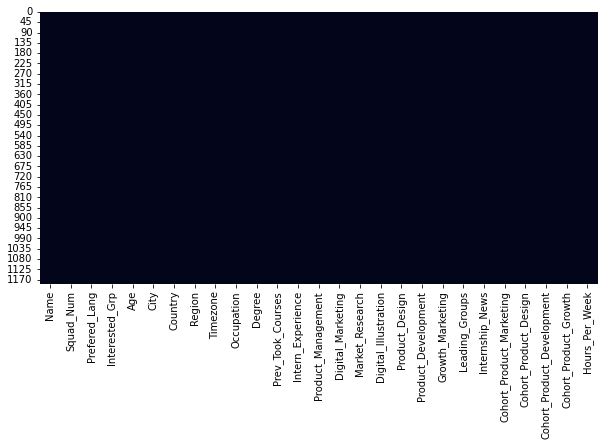

In [38]:
# now the plot is blank ass all the missing values are handled
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(df.isnull(), cbar=False)

<center><h3>Applying K - Means Algorithm</h3></center>

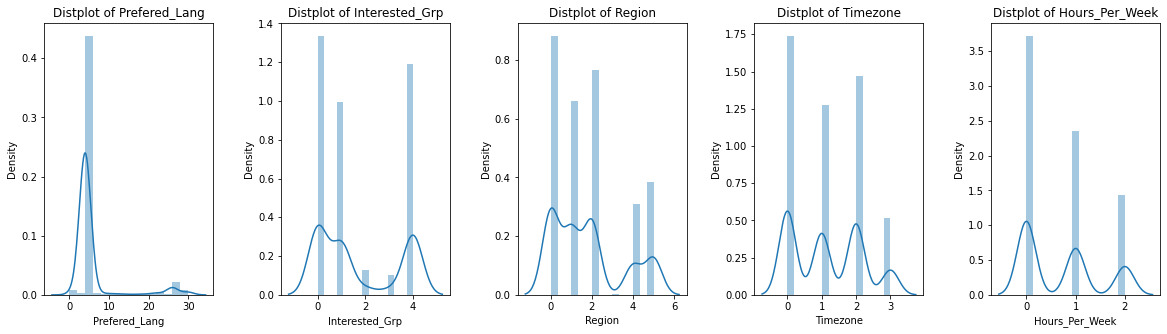

In [39]:
# Plots of factors contributing most in squad arrangement

plt.figure(1 , figsize = (20 , 5))
n = 0 
for x in ['Prefered_Lang' , 'Interested_Grp' ,'Region','Timezone','Hours_Per_Week']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace = 0 , wspace = 0.4)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [40]:
# Applying K - Mean algorithm on dataset provided with input factors

X3 = df[['Prefered_Lang' , 'Interested_Grp' ,'Region','Timezone','Hours_Per_Week']].iloc[: , :].values
inertia = []
for n in range(1 , 11): 
    algorithm = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan'))
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)
    

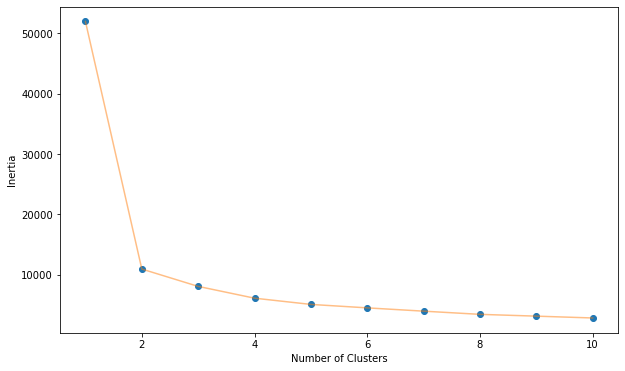

In [41]:
# Plot 

plt.figure(1 , figsize = (10 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [42]:
algorithm = (KMeans(n_clusters = 100 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

y_kmeans = algorithm.fit_predict(X3)
df['cluster'] = pd.DataFrame(y_kmeans)
df['cluster'] = df['cluster']+1

In [43]:
df_2 = pd.read_csv("newDataset.csv")

In [44]:
df_2['Squad_Num'] = df['cluster']

In [45]:
df_2.sort_values("Squad_Num",inplace=True)

In [46]:
df_2.head(50)

,Name,Squad_Num,Prefered_Lang,Interested_Grp,Age,City,Country,Region,Timezone,Occupation,...,Product_Design,Product_Development,Growth_Marketing,Leading_Groups,Internship_News,Cohort_Product_Marketing,Cohort_Product_Design,Cohort_Product_Development,Cohort_Product_Growth,Hours_Per_Week
593,Alessandra,1,English,Product Design,20.0,Faisalabad,Pakistan,APAC,Asia,0,...,2,2,2,5,email,Starting on 15th August,Starting on 22nd August,Any,Any,10-15 hours
706,Charles,1,English,Product Design,20.0,hyderabad,Pakistan,APAC,Asia,0,...,3,2,2,3,LinkedIn,Any,Starting on 5th September,Any,Any,10-15 hours
703,Preston,1,English,Product Design,21.0,islamabad,Pakistan,APAC,Asia,0,...,2,2,2,3,linkedin,Any,Starting on 5th September,Any,Any,10-15 hours
698,Aileen,1,English,Product Design,20.0,Karachi,Pakistan,APAC,Asia,0,...,2,2,2,3,Linkedin,Any,Starting on 22nd August,Any,Any,10-15 hours
684,Jordyn,1,English,Product Design,22.0,Hyderabad,Pakistan,APAC,Asia,0,...,3,2,2,3,Internet,Starting on 22nd August,Starting on 5th September,Any,Any,10-15 hours
650,Augustus,1,English,Product Design,21.0,Karachi,Pakistan,APAC,Asia,0,...,1,2,2,3,Instagram,Any,Starting on 22nd August,Any,Any,10-15 hours
644,Isla,1,English,Product Design,17.0,Islamabad,Pakistan,APAC,Asia,0,...,4,2,2,3,RadicalX,"Starting on 15th August,Starting on 22nd August","Starting on 22nd August,Starting on 5th September",Any,Any,10-15 hours
633,Moses,1,English,Product Design,21.0,Rawalpindi,Pakistan,APAC,Asia,0,...,4,5,2,4,Linkedin,Any,Starting on 22nd August,Starting on 5th September,Any,10-15 hours
627,Madelyn,1,English,Product Design,19.0,Karachi,Pakistan,APAC,Asia,0,...,2,2,2,3,"On radical X instagram i think, i don't rememb...",Any,Starting on 22nd August,Any,Any,10-15 hours
618,Neil,1,English,Product Design,23.0,Nawabshah Sindh,Pakistan,APAC,Asia,1,...,5,2,2,3,LinkedIn,Starting on 15th August,Starting on 22nd August,Any,Any,10-15 hours


<center><h3>Analysis and Insight of Dataset</h3></center>

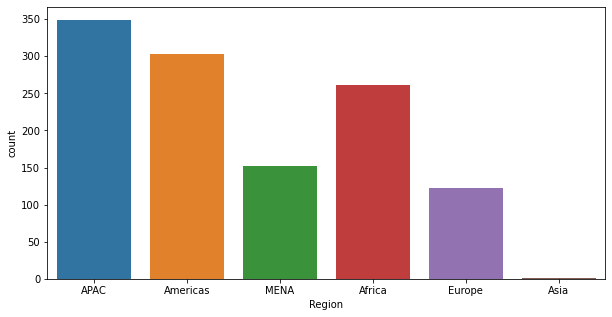

In [47]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.countplot(x='Region',data=df_2)
# plt.rcParams['figure.figsize'] = [10, 5]
plt.show()